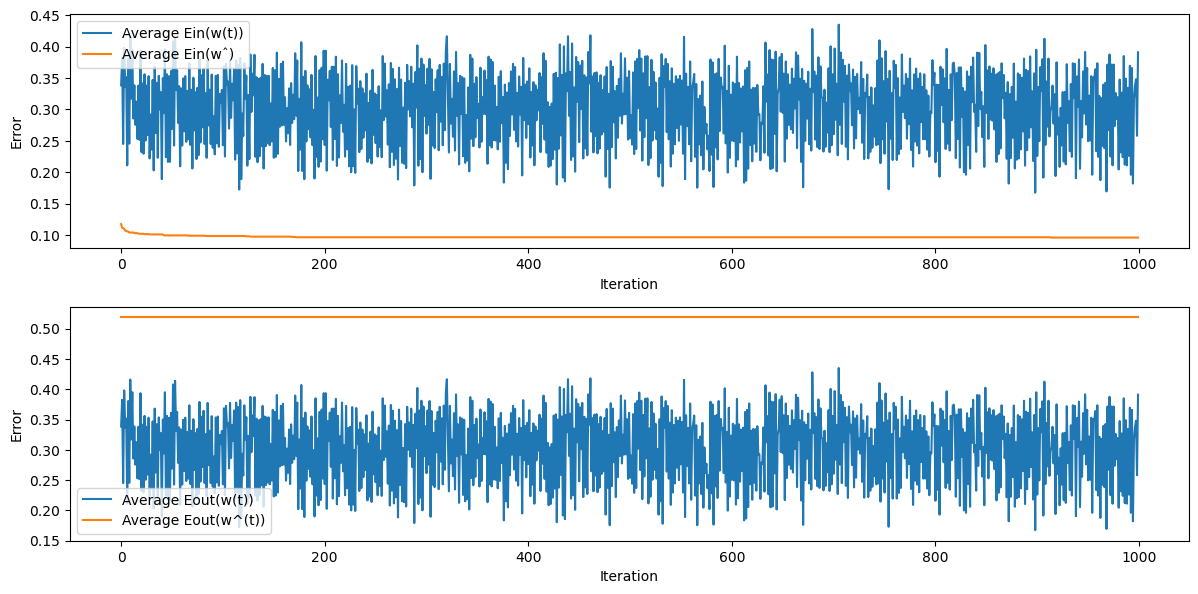

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def generate_data(d, N):
    weights = np.random.rand(d + 1) * 2 - 1
    X = np.column_stack((np.ones(N), np.random.rand(N, d) * 2 - 1))
    y = np.sign(np.dot(X, weights))

    y = flip_labels(N,y)
    return X, y, weights

def flip_labels(N,y):
    flip_indices = np.random.choice(N, size=N // 10, replace=False)
    y[flip_indices] *= -1
    return y
    

def pocket_algorithm(X, y, T):
    N, d = X.shape
    w_pocket = np.zeros(d)
    w_current = np.zeros(d)
    best_error = N

    Ein_history = []
    Ein_pocket_history = []
    Eout_history = []

    for t in range(T):
        indices = np.random.permutation(N)

        for i in indices:
            if y[i] * np.dot(w_current, X[i]) <= 0:
                w_current += y[i] * X[i]

                Ein = np.sum(np.sign(np.dot(X, w_current)) != y) / N
                Ein_history.append(Ein)
                Eout_history.append(calculate_error(X,y,w_current))

                if Ein < best_error:
                    best_error = Ein
                    w_pocket = np.copy(w_current)

        Ein_pocket_history.append(best_error)

    return Ein_history, Ein_pocket_history, w_pocket, Eout_history

def calculate_error(X, y, w):
    N = X.shape[0]
    Eout = np.sum(np.sign(np.dot(X, w)) != y) / N
    return Eout

np.random.seed(25)  

N = 100
d = 2
T = 1000
num_experiments = 20

Ein_avg = np.zeros((num_experiments, T))
Ein_pocket_avg = np.zeros((num_experiments, T))
Eout_avg = np.zeros((num_experiments, T))
Eout_pocket_avg = np.zeros((num_experiments, T))

for i in range(num_experiments):
    X, y, w_true = generate_data(d, N)
    Ein_history, Ein_pocket_history, w_pocket, Eout_history = pocket_algorithm(X, y, T)

    Ein_avg[i, :] = Ein_history[:T]
    Ein_pocket_avg[i, :] = Ein_pocket_history[:T]
    Eout_avg[i, :] = Eout_history[:T]

    X_test, y_test_true, _ = generate_data(d, N)
    Eout_pocket_avg[i, :] = calculate_error(X_test, y_test_true, w_pocket)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.mean(Ein_avg, axis=0), label='Average Ein(w(t))')
plt.plot(np.mean(Ein_pocket_avg, axis=0), label='Average Ein(wˆ)')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.mean(Eout_avg, axis=0), label='Average Eout(w(t))')
plt.plot(np.mean(Eout_pocket_avg, axis=0), label='Average Eout(w^(t))')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()